In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import numpy as np
X = np.load('/content/drive/MyDrive/option_price_prediction/data_preprocessing/data_08_18/input_08_18_exp2.npy')
y = np.load('/content/drive/MyDrive/option_price_prediction/data_preprocessing/data_08_18/output.npy')
print(X.shape, y.shape)

(100000, 81) (100000,)


In [15]:
permutation_index = np.random.permutation(len(X))
X = X[permutation_index]
y = y[permutation_index]
X.shape

(100000, 81)

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = X[::2]
y = y[::2]

In [32]:
def divide_data(data, train_rate, val_rate, test_rate):
    train = data[0 : int(len(data) * train_rate)]
    val = data[int(len(data) * train_rate) : int(len(data) * (train_rate + val_rate))]
    test = data[int(len(data) * (train_rate + val_rate)) : len(data)]
    return train, val, test

In [33]:
train_X, val_X, test_X = divide_data(X, 0.6, 0.2, 0.2)
train_y, val_y, test_y = divide_data(y, 0.6, 0.2, 0.2)
print(train_X.shape)
print(train_y.shape)

(30000, 81)
(30000,)


In [34]:
# Build the model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(train_X.shape[1], 1)))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(Flatten())
model.add(Dense(units=1))

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
model.compile(optimizer='adam', loss='MeanSquaredError', metrics=\
              ['mean_absolute_error'])
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/option_price_prediction/model/08_18/exp1/model_checkpoint_exp2_{epoch:02d}.h5', save_freq='epoch')

In [35]:
history = model.fit(train_X, train_y, epochs=100, batch_size=64, validation_data=(val_X, val_y), callbacks=[checkpoint, reduce_lr])

Epoch 1/100
469/469 [==============================] - 20s 26ms/step - loss: 660.3674 - mean_absolute_error: 7.5094 - val_loss: 294.5844 - val_mean_absolute_error: 13.5635 - lr: 0.0010
Epoch 2/100
469/469 [==============================] - 11s 23ms/step - loss: 193.1260 - mean_absolute_error: 3.6416 - val_loss: 31.9660 - val_mean_absolute_error: 3.0887 - lr: 0.0010
Epoch 3/100
469/469 [==============================] - 12s 25ms/step - loss: 106.0257 - mean_absolute_error: 2.8221 - val_loss: 35.1139 - val_mean_absolute_error: 2.7810 - lr: 0.0010
Epoch 4/100
469/469 [==============================] - 11s 23ms/step - loss: 236.0717 - mean_absolute_error: 5.9975 - val_loss: 34.4290 - val_mean_absolute_error: 3.3269 - lr: 0.0010
Epoch 5/100
469/469 [==============================] - 10s 22ms/step - loss: 84.1131 - mean_absolute_error: 2.8422 - val_loss: 17.3257 - val_mean_absolute_error: 1.3229 - lr: 0.0010
Epoch 6/100
469/469 [==============================] - 11s 24ms/step - loss: 62.0234

KeyboardInterrupt: ignored

In [ ]:
model.save('/content/drive/MyDrive/option_price_prediction/model_08_18.h5')

In [21]:
test_loss, test_mae = model.evaluate(test_X, test_y)
print(test_loss, test_mae)

625/625 [==============================] - 6s 9ms/step - loss: 7.3530 - mean_absolute_error: 0.5416
7.352952480316162 0.541633665561676


In [27]:
pred = model.predict(test_X).round(4)

625/625 [==============================] - 4s 6ms/step


In [28]:
df = pd.DataFrame()
df['real'] = list(test_y)
df['pred'] = list(pred)
df.head(60)

,real,pred
0,0.025,[-0.097]
1,2.500,[2.2145]
2,16.900,[17.942]
3,10.800,[11.1172]
4,0.025,[0.0485]
5,0.025,[-0.0452]
6,10.950,[10.723]
7,33.150,[33.2133]
8,2.600,[2.7732]
9,0.125,[0.4485]


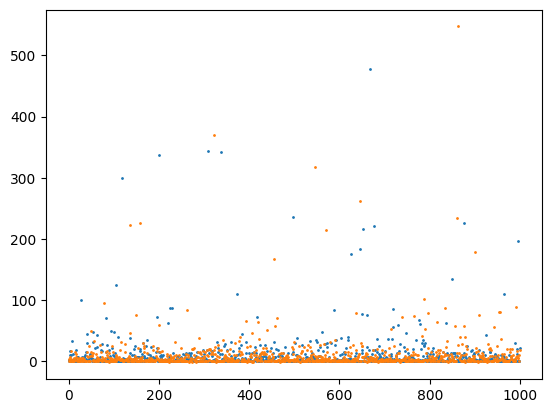

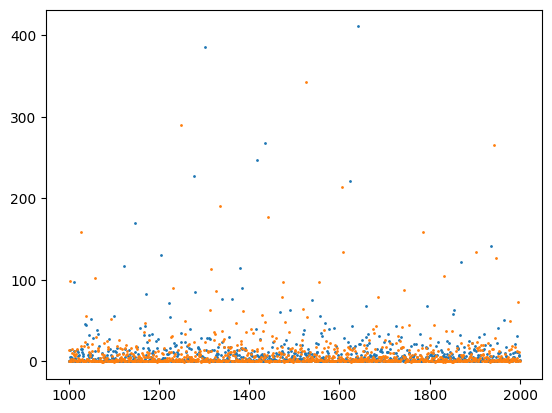

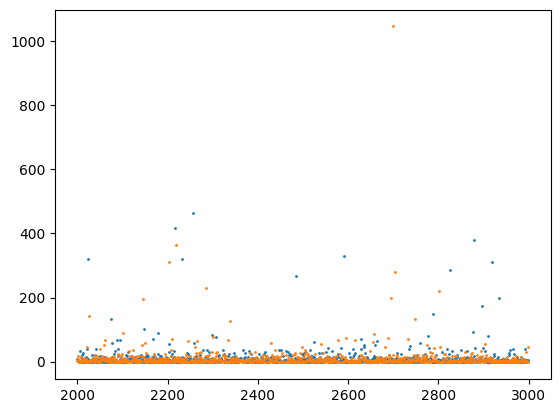

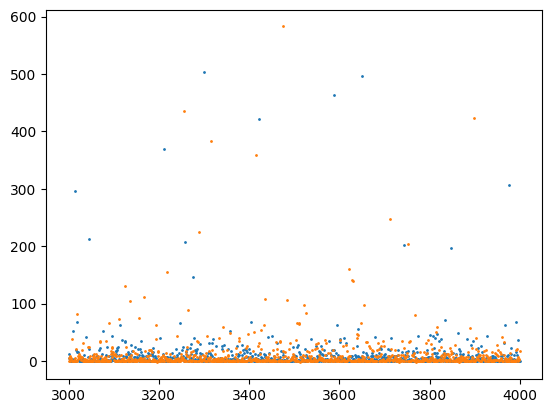

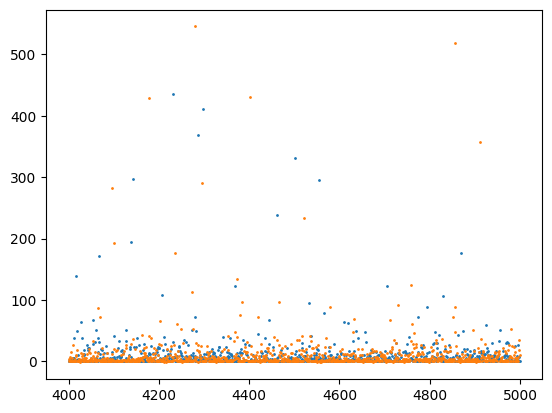

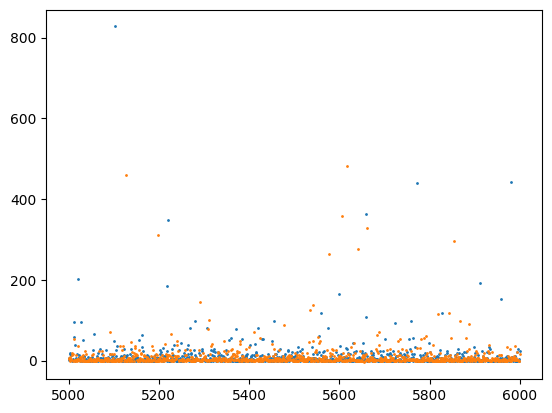

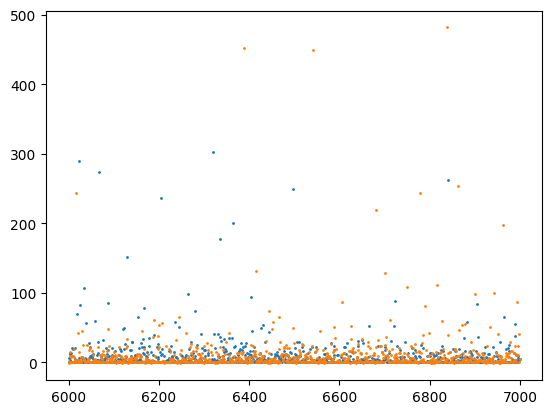

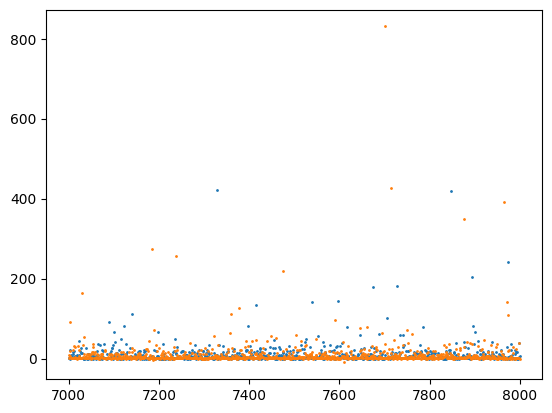

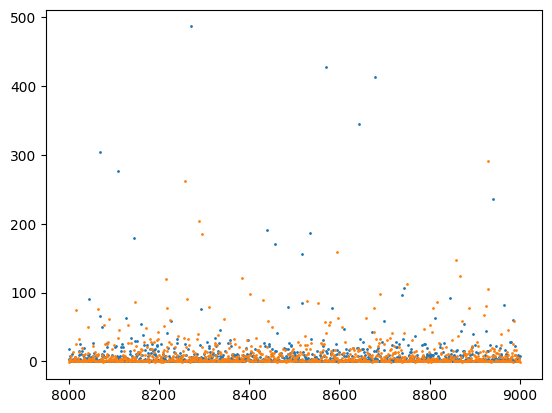

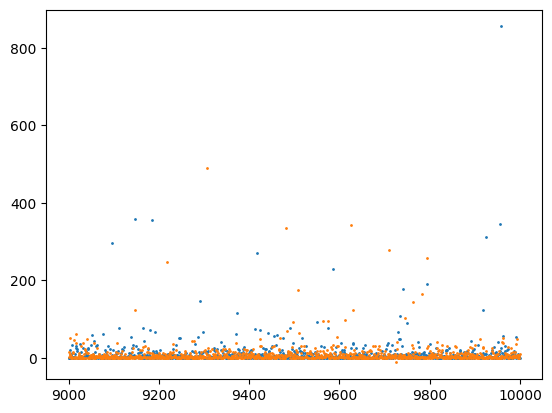

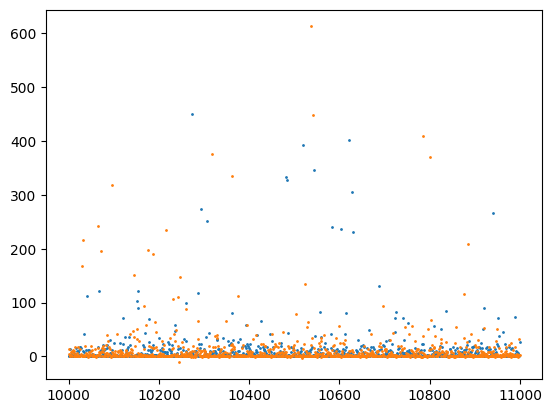

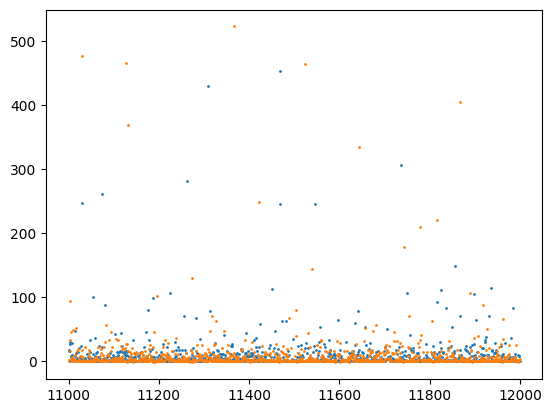

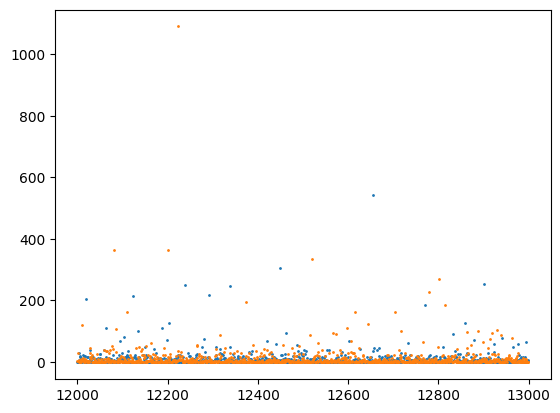

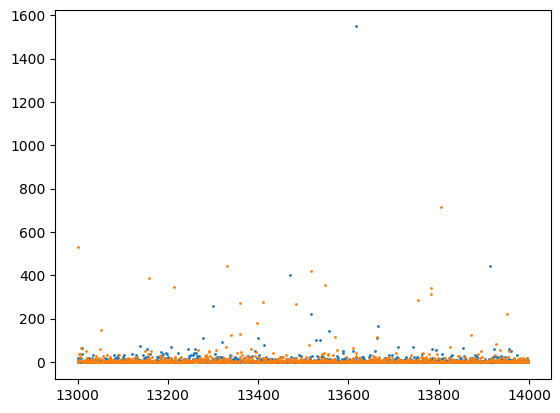

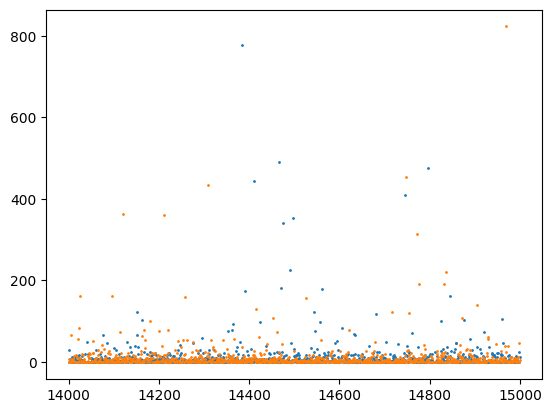

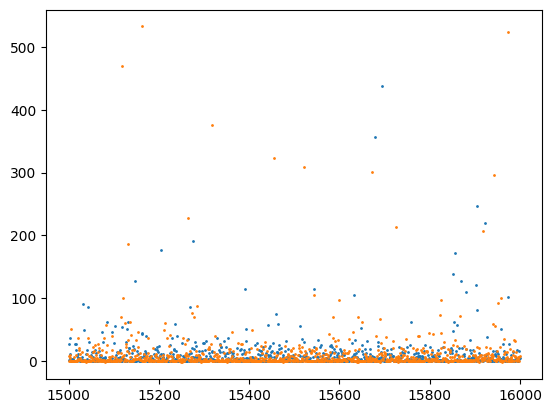

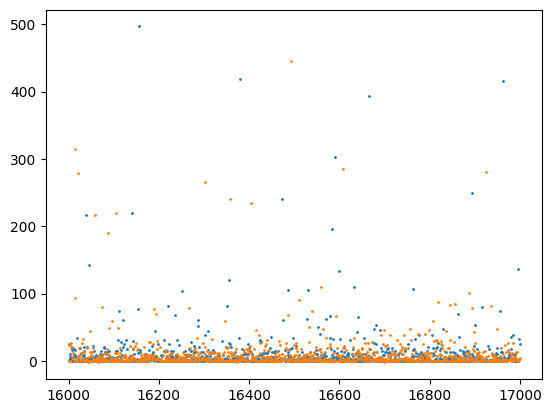

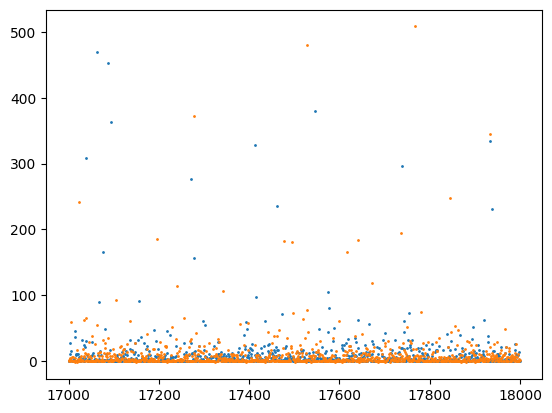

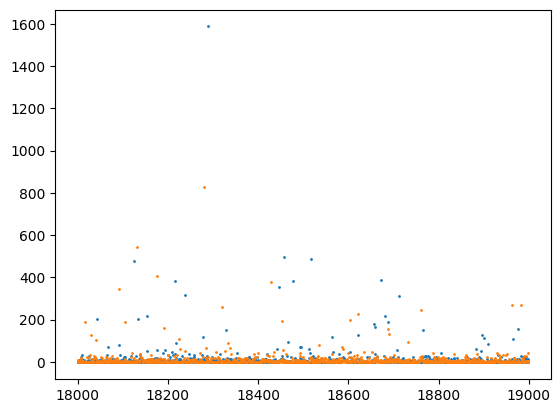

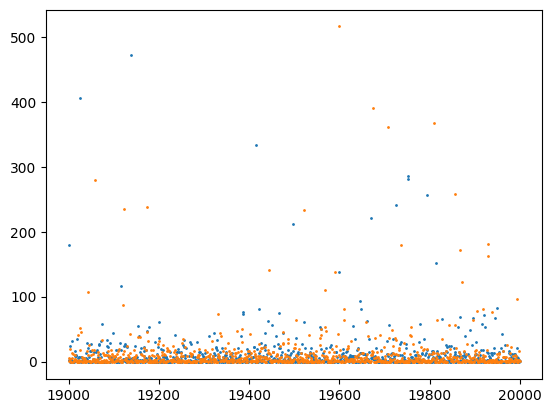

In [26]:
length = len(list(test_y))
for i in range(20):
    plt.figure()
    plt.scatter( [i for i in range(length // 20 * i, length // 20 * (i + 1))], test_y[length // 20 * i : length // 20 * (i + 1)], marker='o', s=1)
    plt.scatter( [i for i in range(length // 20 * i, length // 20 * (i + 1))], pred[length // 20 * i : length // 20 * (i + 1)], marker='o', s=1)